In [95]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools

from sklearn.preprocessing import OrdinalEncoder

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from sklearn import svm
# from sklearn.ensemble import RandomForestClassifier

In [118]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [4]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


# 전처리

**1. index, FLAG_MOBIL, occyp_type: 칼럼 제거**
- FLAG_MOBIL: 모든 값이 1
- occyp_type: 결측값이 너무 많음

In [121]:
train['index']

0            0
1            1
2            2
3            3
4            4
         ...  
26452    26452
26453    26453
26454    26454
26455    26455
26456    26456
Name: index, Length: 26457, dtype: int64

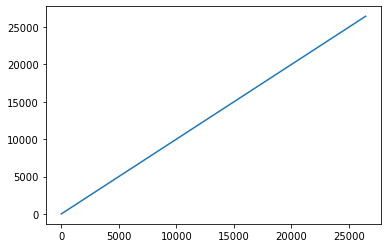

In [122]:
ax = plt.plot(train['index'])

In [7]:
train.drop(['index', 'FLAG_MOBIL', 'occyp_type'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL', 'occyp_type'], axis=1, inplace=True)

**2. DAYS_BIRTH, DAYS_EMPLOYED, begin_month: 연도 단위로 변환**

In [8]:
# 날짜 변수 : 데이터 수집 당시 (0)부터 역으로 셈, 
# DAYS_BIRTH: -1은 데이터 수집일 하루 전에 태어났음을 의미
# DAYS_EMPLOYED : 양수 값은 고용되지 않은 상태를 의미
# begin_month: -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

In [9]:
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
count,26457.000000,26457.000000,26457.000000
mean,-15958.053899,59068.750728,-26.123294
std,4201.589022,137475.427503,16.559550
min,-25152.000000,-15713.000000,-60.000000
25%,-19431.000000,-3153.000000,-39.000000
50%,-15547.000000,-1539.000000,-24.000000
75%,-12446.000000,-407.000000,-12.000000
max,-7705.000000,365243.000000,0.000000


In [86]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
    
day_col=['DAYS_BIRTH', 'DAYS_EMPLOYED']
for col in day_col:
    train[col] = train[col].map(lambda x: 0 if x > 0 else x)
    test[col] = test[col].map(lambda x: 0 if x > 0 else x)
    train[col]=np.abs(train[col])/365
    test[col]=np.abs(test[col])/365

train['begin_month']=abs(train['begin_month'])/12
test['begin_month']=abs(test['begin_month'])/12

In [87]:
train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
count,26088.000000,26088.000000,26088.000000
mean,43.805478,6.013541,2.176716
std,11.545602,6.510657,1.379828
min,21.109589,0.000000,0.000000
25%,34.120548,1.098630,1.000000
50%,42.787671,4.202740,2.000000
75%,53.331507,8.610959,3.250000
max,68.909589,43.049315,5.000000


**3. gender, car, reality: 이진 변수 수치화**

In [11]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64


**4. child_num, family_size: 이상치 제거**

In [107]:
child_g = train.groupby('child_num')
child_g_size = child_g.size
child_g_size()

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
dtype: int64

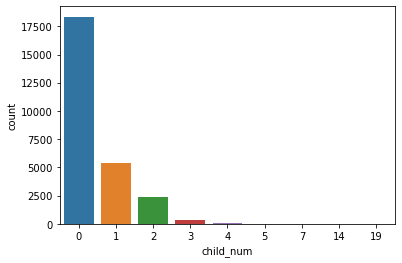

In [97]:
ax = sns.countplot(x = 'child_num', data = train)

In [108]:
# child_num, family_size 이상치 존재 -> IQR 이상치 제거 방식
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [109]:
for df in [train, test]:
    outlier_idx = get_outlier(df=df, column='child_num', weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)
    outlier_idx = get_outlier(df=df, column='family_size', weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

**5. income_total: 로그 변환**

In [110]:
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

**6. income_type, edu_type, family_type, house_type: OrdinalEncoder**

In [111]:
categorical_feats = ['income_type', 'edu_type', 'family_type', 'house_type']

enc = OrdinalEncoder()
enc.fit(train[categorical_feats])
train[categorical_feats] = enc.transform(train[categorical_feats])
test[categorical_feats] = enc.transform(test[categorical_feats])

In [16]:
# !pip install category_encoders

# from category_encoders.ordinal import OrdinalEncoder

# categorical_feats = ['income_type', 'edu_type', 'family_type', 'house_type']

# encoder = OrdinalEncoder(categorical_feats)
# train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])
# test[categorical_feats] = encoder.transform(test[categorical_feats])

# 확인

In [17]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,12.218505,0.0,1.0,1.0,2.0,-13899,-4709,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,12.419174,0.0,4.0,0.0,1.0,-11380,-1540,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,13.017007,4.0,1.0,1.0,1.0,-19087,-4434,0,1,0,2.0,-22.0,2.0
3,0,0,1,0,12.218505,0.0,4.0,1.0,1.0,-15088,-2092,0,1,0,2.0,-37.0,0.0
4,0,1,1,0,11.967193,2.0,1.0,1.0,1.0,-15037,-2105,0,0,0,2.0,-26.0,2.0


In [18]:
train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [19]:
numerical_feats = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit']
categorical_feats = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'work_phone', 'phone', 'email']

In [20]:
train[numerical_feats].describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
count,26088.000000,26088.000000,26088.000000,26088.000000,26088.000000,26088.000000,26088.000000
mean,0.387534,12.022611,-15988.999502,59770.923643,2.153519,-26.120592,1.519473
std,0.646875,0.480361,4214.144872,138098.629185,0.832739,16.557938,0.702609
min,0.000000,10.203666,-25152.000000,-15713.000000,1.000000,-60.000000,0.000000
25%,0.000000,11.707686,-19466.000000,-3143.000000,2.000000,-39.000000,1.000000
50%,0.000000,11.967193,-15617.500000,-1534.000000,2.000000,-24.000000,2.000000
75%,1.000000,12.323865,-12454.000000,-401.000000,3.000000,-12.000000,2.000000
max,2.000000,14.269767,-7705.000000,365243.000000,4.000000,0.000000,2.000000


In [21]:
train[categorical_feats].astype('category').apply(pd.Series.value_counts)

,gender,car,reality,income_type,edu_type,family_type,house_type,work_phone,phone,email
0.0,17467.0,16225.0,8532.0,6125.0,23.0,2109.0,102,20235.0,18400.0,23701.0
1.0,8621.0,9863.0,17556.0,4436.0,7086.0,17869.0,23321,5853.0,7688.0,2387.0
2.0,NaN,NaN,NaN,2118.0,1001.0,1527.0,806,NaN,NaN,NaN
3.0,NaN,NaN,NaN,7.0,255.0,3483.0,189,NaN,NaN,NaN
4.0,NaN,NaN,NaN,13402.0,17723.0,1100.0,425,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,1245,NaN,NaN,NaN


## EDA
* index: (신용등급 예측과 무관하여 제거한 열)
* gender: 성별 (수치화: F=0, M=1)
* car: 차량 소유 여부 (수치화 N=0, Y=1)
* reality: 부동산 소유 여부 (수치화)
* child_num: 자녀 수 (이상치 제거)
* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 신용도가 높은 사용자

### 0. Credit

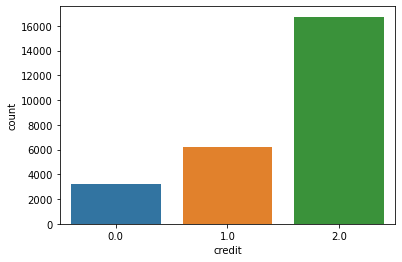

In [94]:
ax = sns.countplot('credit', data = train)

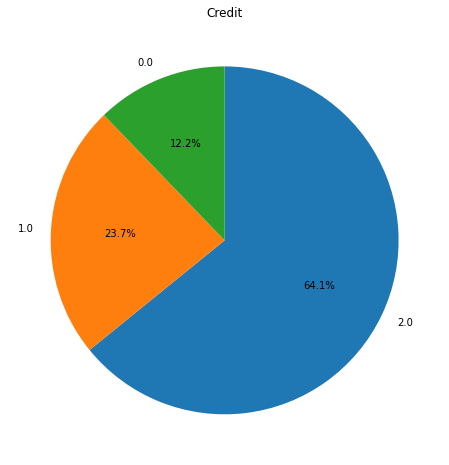

In [71]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%1.1f%%", startangle = 90, counterclock=False)
plt.title('Credit')
plt.show()

### 1. Gender

In [76]:
train[['credit', 'gender']].corr()

,credit,gender
credit,1.000000,0.000653
gender,0.000653,1.000000


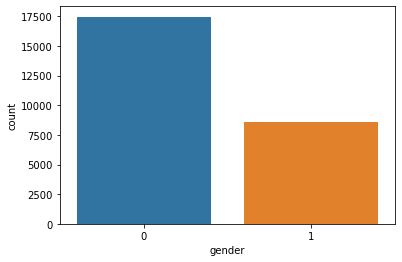

In [24]:
ax = sns.countplot(x = 'gender', data = train)

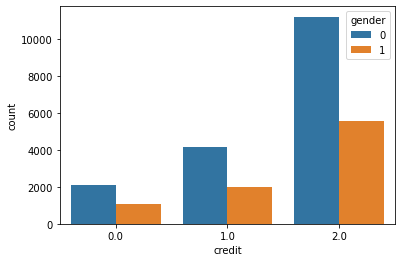

In [23]:
ax = sns.countplot(x = 'credit',  hue = "gender", data = train)

In [34]:
gender_g = train.groupby(['gender', 'credit'])
gender_g_size = gender_g.size()
gender_g_size

gender  credit
0       0.0        2119
        1.0        4161
        2.0       11187
1       0.0        1064
        1.0        2009
        2.0        5548
dtype: int64

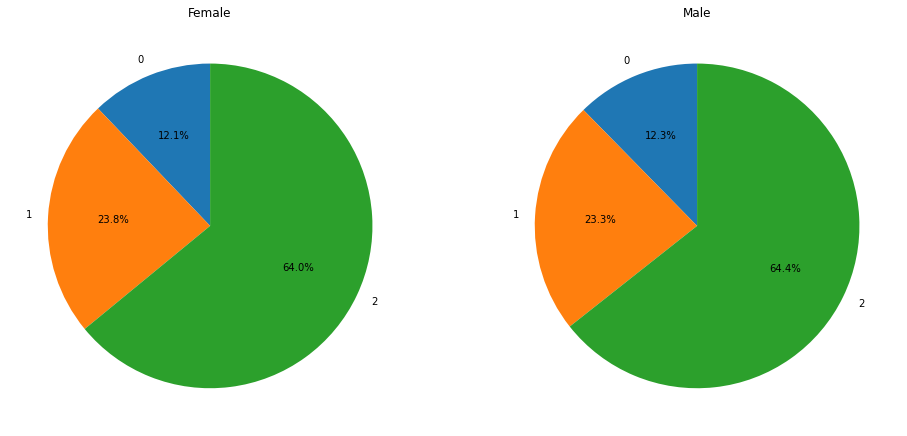

In [72]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(gender_g_size[0], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')
ax[1].pie(gender_g_size[1], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')

ax[0].set_title('Female')
ax[1].set_title('Male')

plt.show()

### 2. Car

In [75]:
train[['credit', 'car']].corr()

,credit,car
credit,1.000000,0.008601
car,0.008601,1.000000


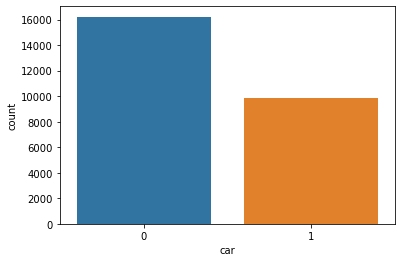

In [54]:
ax = sns.countplot(x = 'car', data = train)

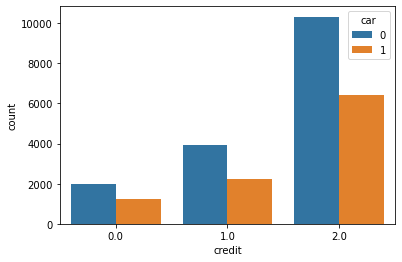

In [55]:
ax = sns.countplot(x = 'credit',  hue = "car", data = train)

In [57]:
car_g = train.groupby(['car', 'credit'])
car_g_size = car_g.size()
car_g_size

car  credit
0    0.0        1967
     1.0        3939
     2.0       10319
1    0.0        1216
     1.0        2231
     2.0        6416
dtype: int64

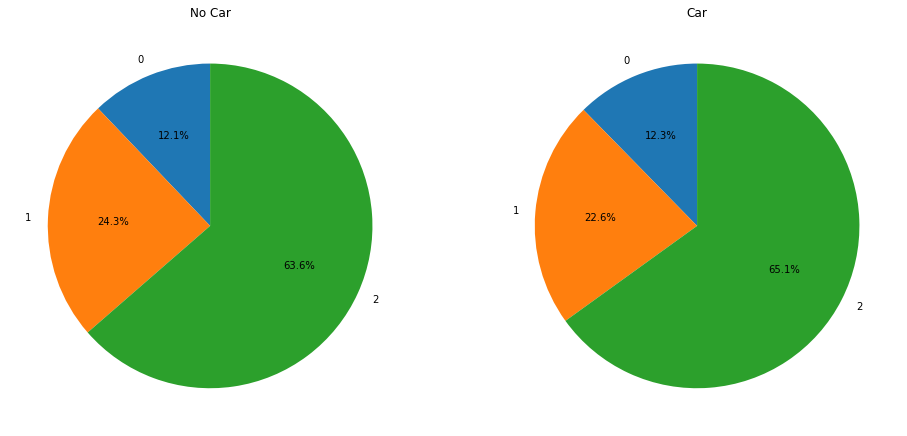

In [74]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(car_g_size[0], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')
ax[1].pie(car_g_size[1], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')

ax[0].set_title('No Car')
ax[1].set_title('Car')

plt.show()

### 3. Reality

In [77]:
train[['credit', 'reality']].corr()

,credit,reality
credit,1.000000,-0.009287
reality,-0.009287,1.000000


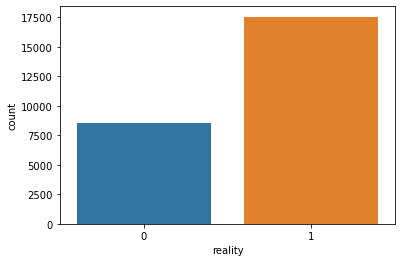

In [78]:
ax = sns.countplot(x = 'reality', data = train)

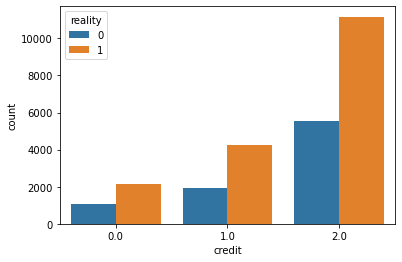

In [79]:
ax = sns.countplot(x = 'credit',  hue = "reality", data = train)

In [80]:
real_g = train.groupby(['reality', 'credit'])
real_g_size = real_g.size()
real_g_size

reality  credit
0        0.0        1055
         1.0        1910
         2.0        5567
1        0.0        2128
         1.0        4260
         2.0       11168
dtype: int64

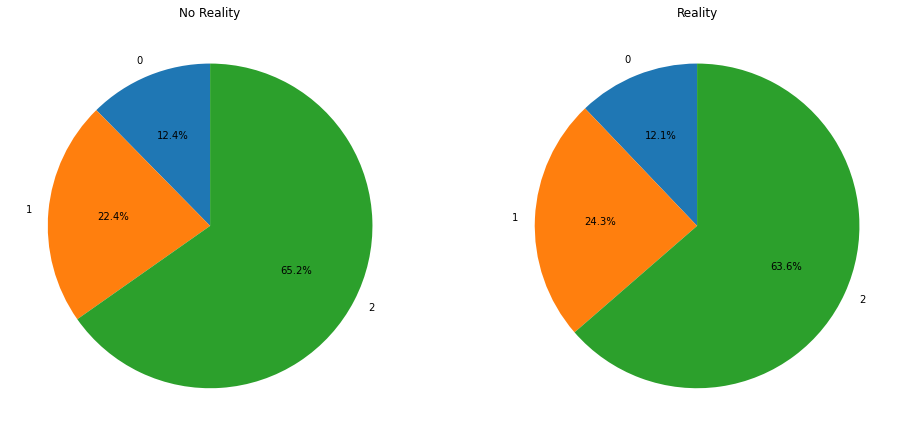

In [81]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(real_g_size[0], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')
ax[1].pie(real_g_size[1], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')

ax[0].set_title('No Reality')
ax[1].set_title('Reality')

plt.show()

### 4. Child_num

In [112]:
train[['credit', 'child_num']].corr()

,credit,child_num
credit,1.0000,0.0033
child_num,0.0033,1.0000


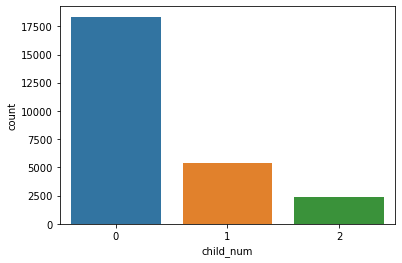

In [85]:
ax = sns.countplot(x = 'child_num', data = train)

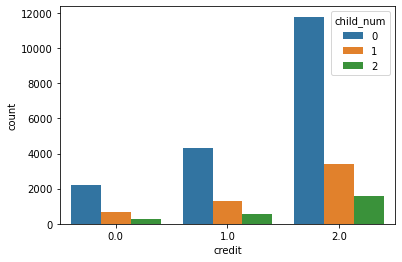

In [88]:
ax = sns.countplot(x = 'credit',  hue = "child_num", data = train)

In [113]:
child_g = train.groupby(['child_num', 'credit'])
child_g_size = child_g.size()
child_g_size

child_num  credit
0          0.0        2233
           1.0        4322
           2.0       11785
1          0.0         682
           1.0        1313
           2.0        3391
2          0.0         268
           1.0         535
           2.0        1559
dtype: int64

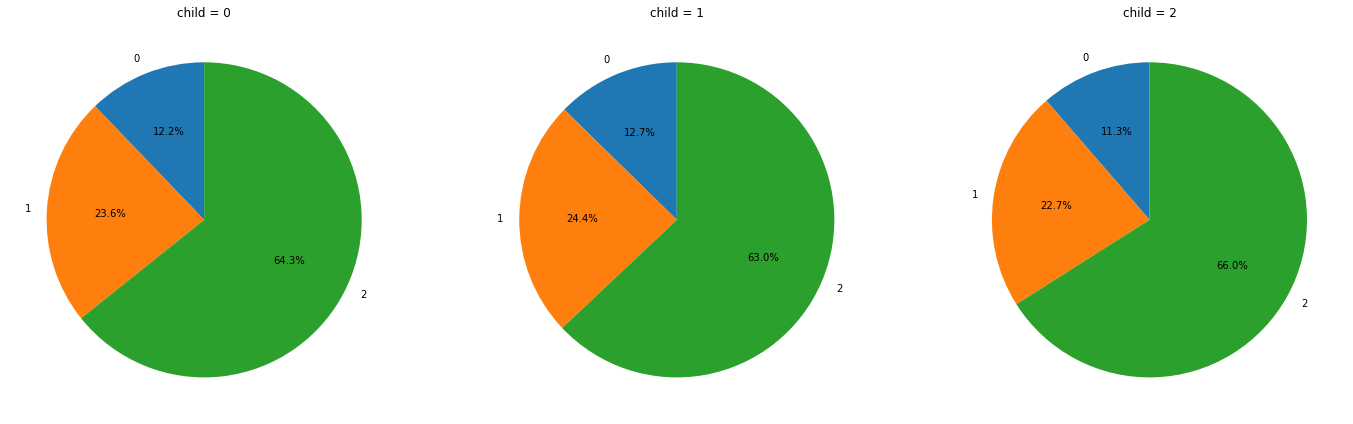

In [114]:
f, ax = plt.subplots(1, 3, figsize=(24, 8))

ax[0].pie(child_g_size[0], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')
ax[1].pie(child_g_size[1], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')
ax[2].pie(child_g_size[2], labels=[0, 1, 2], startangle = 90, autopct = '%1.1f%%')

ax[0].set_title('child = 0')
ax[1].set_title('child = 1')
ax[2].set_title('child = 2')

plt.show()